In [5]:
import pandas as pd

df = pd.read_csv("../backend/models/clean_jobs.csv")
print(df.shape)
df.head()


(986, 16)


,jobid,job_title,description_text,benefits,job_type,location,salary_formatted,company_name,company_rating,company_reviews_count,country,url,apply_link,job_title_lc,company_name_lc,location_lc
0,d46480488e3aa20c,FitLab Email Marketing Manager,Description: \n Who Is FitLab: FitLab is a p...,"[""401(k)"",""Dental insurance"",""Disability insur...",Full-time,California,"$90,000 - $105,000 a year",FitLab INC,4.5,4,US,https://www.indeed.com/viewjob?jk=d46480488e3a...,https://www.indeed.com/viewjob?jk=d46480488e3a...,fitlab email marketing manager,fitlab inc,california
1,ba9bf4e04cfd9cdb,Customer Service Representative - Work From Home,The Customer Associate is the first point of c...,"[""401(k) matching"",""Continuing education credi...",Permanent,"Sugar Land, TX 77479",$28 - $50 an hour,Buccal Up Dental,5.0,4,US,https://www.indeed.com/viewjob?jk=ba9bf4e04cfd...,https://www.indeed.com/viewjob?jk=ba9bf4e04cfd...,customer service representative - work from home,buccal up dental,"sugar land, tx 77479"
2,9e4031d06dd42d32,Information Technology Support Specialist,About Peraton Peraton is a next-generation na...,"[""Dental insurance"",""Disability insurance"",""He...",Full-time,United States,"$66,000 - $106,000 a year",Peraton,3.1,297,US,https://www.indeed.com/viewjob?jk=9e4031d06dd4...,https://www.indeed.com/viewjob?jk=9e4031d06dd4...,information technology support specialist,peraton,united states
3,46554b6bae3dfc9f,Opérateur.trice de réservation hotelière (de j...,"Dans ce cadre, vous êtes amené/e à réaliser le...","[""Prise en charge du transport quotidien"",""RTT""]",CDD,75012 Paris,"1 964,03 € par mois",Samu social de Paris,3.6,15,FR,https://fr.indeed.com/viewjob?jk=46554b6bae3dfc9f,https://fr.indeed.com/viewjob?jk=46554b6bae3dfc9f,opérateur.trice de réservation hotelière (de j...,samu social de paris,75012 paris
4,06e52e564455d499,Chauffeur Opérateur Curage H/F,Informations générales ...,"[""Intéressement et participation""]","CDI, Temps plein",Wissous (91),De 24 000 € à 28 000 € par an,Terideal,2.6,16,FR,https://fr.indeed.com/viewjob?jk=06e52e564455d499,https://fr.indeed.com/viewjob?jk=06e52e564455d499,chauffeur opérateur curage h/f,terideal,wissous (91)


In [ ]:
text_cols = ["job_title","description_text","job_type","location","company_name","salary_formatted"]


if "benefits" in df.columns:
    text_cols.append("benefits")

for c in text_cols:
    df[c] = df[c].fillna("").astype(str)


if "company_rating" in df.columns:
    df["company_rating"] = pd.to_numeric(df["company_rating"], errors="coerce").fillna(0)

print("Missing values per column:")
df.isna().sum()


Missing values per column:


jobid                    0
job_title                0
description_text         0
benefits                 0
job_type                 0
location                 0
salary_formatted         0
company_name             0
company_rating           0
company_reviews_count    0
country                  0
url                      0
apply_link               0
job_title_lc             0
company_name_lc          0
location_lc              0
dtype: int64

In [8]:
import re

def normalize_text(s: str) -> str:
    s = s.lower()
    s = re.sub(r"<.*?>", " ", s)           # remove HTML tags
    s = re.sub(r"[^a-z0-9\s]", " ", s)     # keep letters/numbers
    s = re.sub(r"\s+", " ", s).strip()     # remove extra spaces
    return s


In [9]:
def build_combined_text(row):
    parts = [
        row["job_title"],
        row["description_text"],
        row.get("benefits",""),
        row["job_type"],
        row["location"],
    ]
    return normalize_text(" ".join([p for p in parts if isinstance(p, str)]))

df["combined_text"] = df.apply(build_combined_text, axis=1)


In [10]:
print("Combined text length summary:")
print(df["combined_text"].str.len().describe())

print("Empty combined_text count:", (df["combined_text"].str.len() == 0).sum())


Combined text length summary:
count      986.000000
mean      5589.007099
std       2236.737040
min       1197.000000
25%       4052.250000
50%       5320.000000
75%       6709.250000
max      18482.000000
Name: combined_text, dtype: float64
Empty combined_text count: 0


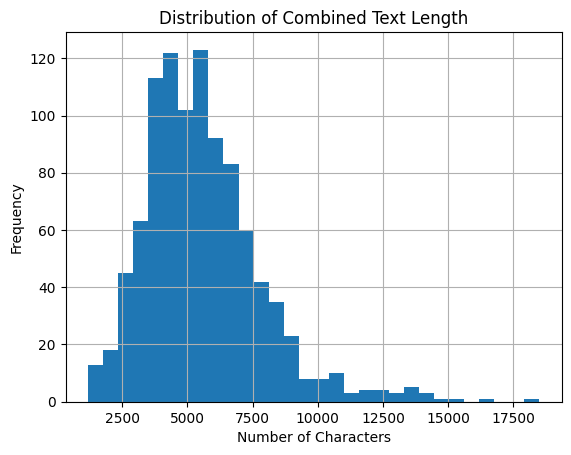

In [15]:
import matplotlib.pyplot as plt

df["combined_text"].str.len().hist(bins=30)
plt.title("Distribution of Combined Text Length")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [11]:
df["description_short"] = df["description_text"].apply(lambda x: x[:250] + "..." if len(x) > 250 else x)
df[["job_title", "description_short"]].head(3)


,job_title,description_short
0,FitLab Email Marketing Manager,Description: \n Who Is FitLab: FitLab is a p...
1,Customer Service Representative - Work From Home,The Customer Associate is the first point of c...
2,Information Technology Support Specialist,About Peraton Peraton is a next-generation na...


In [12]:
locations = sorted(df["location"].dropna().unique().tolist())
job_types = sorted(df["job_type"].dropna().unique().tolist())

print("Unique locations:", len(locations))
print("Unique job types:", len(job_types))
job_types[:20]


Unique locations: 351
Unique job types: 28


['Apprenticeship',
 'CDD',
 'CDI',
 'CDI, Temps partiel',
 'CDI, Temps plein',
 'Contract',
 'Contract, Freelance',
 'Freelance',
 'Full-time',
 'Full-time, Contract',
 'Internship',
 'Intérim',
 'PRN',
 'Part-time',
 'Part-time, Contract',
 'Part-time, Full-time',
 'Part-time, Full-time, Contract',
 'Permanent',
 'Permanent, Part-time, Full-time, Contract',
 'Seasonal']

In [13]:
print("Rows:", len(df))
print("Duplicate job_title+company+location:", df.duplicated(subset=["job_title","company_name","location"]).sum())


Rows: 986
Duplicate job_title+company+location: 0


In [14]:
df.to_csv("../backend/models/jobs_with_features.csv", index=False)
print("Saved jobs_with_features.csv:", df.shape)


Saved jobs_with_features.csv: (986, 18)
